In [98]:
!pip install -q transformers einops accelerate bitsandbytes datasets
!pip install huggingface_hub 
!pip install -U langchain langchain-community langchain-huggingface

In [1]:
from datasets import load_dataset
ds = load_dataset("yashraizada/yelp-open-dataset-top-reviews-per-business")

# Convert the train split to a pandas DataFrame
df = ds["train"].to_pandas()

df

,review_id,business_id,user_id,date,stars,text,total_interaction
0,MgL3iQiWUDTbwWPx4jz4tg,--N9yp3ZWqQIm7DqKRvorg,2Tg2PR3Moc_zh0xqzrqqXQ,2014-02-24 12:23:22,1.0,They damaged my vehicle with a simple brake jo...,7
1,YiFIJRWJJuWPs8L15GAjRA,--N9yp3ZWqQIm7DqKRvorg,Co6xP-qs8JEp7nB_1Nlyrw,2012-10-11 19:58:12,1.0,This store takes advantage of female customers...,6
2,TTEOO9gDkFp9HSjkcB1KtQ,--N9yp3ZWqQIm7DqKRvorg,cqoSx4ITtvkYmWaL6gf0YQ,2014-12-17 22:26:48,4.0,I had a pretty average experience here. I ende...,3
3,FWuuNuhwG9O_Jpv51Btu7Q,--N9yp3ZWqQIm7DqKRvorg,2RBNe42207B9tXzZlQ_-eA,2014-12-13 19:38:41,1.0,Used this shop 12/10/2014 to change car batter...,3
4,WFJvJV5CzLh7OrVOorg8Ag,--N9yp3ZWqQIm7DqKRvorg,Rt6xBH0Fa1EG3QLKfaNfzQ,2011-10-10 21:47:02,5.0,Tried several local tire places for various se...,3
...,...,...,...,...,...,...,...
53335,ZcvPF81vAkEyWQ8roVQkEQ,zznJox6-nmXlGYNWgTDwQQ,E4d8oOzqLa9H_DqQZ7ki4w,2015-09-09 11:26:02,1.0,The rudest drive through help I have ever enco...,2
53336,XsH2cc6JzROvdNU1AO5BdQ,zznJox6-nmXlGYNWgTDwQQ,iNRlQfyP9zOF1ng51qqBpQ,2018-02-02 12:26:32,1.0,I ordered two donuts and an egg sandwich. They...,1
53337,p3HSQ6oV324_0o1MHecJwg,zznJox6-nmXlGYNWgTDwQQ,TkwnhxZfy7AFW1cEIn5u1A,2013-04-17 20:46:16,4.0,This location is a little hard to get into due...,1
53338,deFJh3Z95E-0Yi3nT97dLw,zznJox6-nmXlGYNWgTDwQQ,TL9LfHzDsBQq0y8ZDKKvzg,2017-07-12 15:23:58,2.0,The service is fast and efficient. They always...,1


In [2]:
columns_to_drop = ["total_interaction"]  # replace with actual column names
droped_cols = df.drop(columns=columns_to_drop)
droped_cols


,review_id,business_id,user_id,date,stars,text
0,MgL3iQiWUDTbwWPx4jz4tg,--N9yp3ZWqQIm7DqKRvorg,2Tg2PR3Moc_zh0xqzrqqXQ,2014-02-24 12:23:22,1.0,They damaged my vehicle with a simple brake jo...
1,YiFIJRWJJuWPs8L15GAjRA,--N9yp3ZWqQIm7DqKRvorg,Co6xP-qs8JEp7nB_1Nlyrw,2012-10-11 19:58:12,1.0,This store takes advantage of female customers...
2,TTEOO9gDkFp9HSjkcB1KtQ,--N9yp3ZWqQIm7DqKRvorg,cqoSx4ITtvkYmWaL6gf0YQ,2014-12-17 22:26:48,4.0,I had a pretty average experience here. I ende...
3,FWuuNuhwG9O_Jpv51Btu7Q,--N9yp3ZWqQIm7DqKRvorg,2RBNe42207B9tXzZlQ_-eA,2014-12-13 19:38:41,1.0,Used this shop 12/10/2014 to change car batter...
4,WFJvJV5CzLh7OrVOorg8Ag,--N9yp3ZWqQIm7DqKRvorg,Rt6xBH0Fa1EG3QLKfaNfzQ,2011-10-10 21:47:02,5.0,Tried several local tire places for various se...
...,...,...,...,...,...,...
53335,ZcvPF81vAkEyWQ8roVQkEQ,zznJox6-nmXlGYNWgTDwQQ,E4d8oOzqLa9H_DqQZ7ki4w,2015-09-09 11:26:02,1.0,The rudest drive through help I have ever enco...
53336,XsH2cc6JzROvdNU1AO5BdQ,zznJox6-nmXlGYNWgTDwQQ,iNRlQfyP9zOF1ng51qqBpQ,2018-02-02 12:26:32,1.0,I ordered two donuts and an egg sandwich. They...
53337,p3HSQ6oV324_0o1MHecJwg,zznJox6-nmXlGYNWgTDwQQ,TkwnhxZfy7AFW1cEIn5u1A,2013-04-17 20:46:16,4.0,This location is a little hard to get into due...
53338,deFJh3Z95E-0Yi3nT97dLw,zznJox6-nmXlGYNWgTDwQQ,TL9LfHzDsBQq0y8ZDKKvzg,2017-07-12 15:23:58,2.0,The service is fast and efficient. They always...


In [17]:
# take a random 20% sample (≈53 340 rows)
df_quarter = droped_cols.sample(frac=0.10, random_state=42)
quater_dataset = df_quarter.reset_index(drop=True)
quater_dataset

,review_id,business_id,user_id,date,stars,text
0,3jWKn16YGRMzu9-4DR6yQQ,OvAyaPnYYFeyvcP1HdAVnQ,W22SON2bw6mpP6pMrQ0dhQ,2019-01-10 12:29:10,3.0,"We're big fans of Chick-fil-A, but it seems th..."
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...
...,...,...,...,...,...,...
5329,-HDaoD_dBxxzMTJnEA7Q1g,gYh91mSTbMmV3Hk9tNO7KQ,qFh5dfeWmGG-dLt3UT_kZw,2014-10-11 20:39:12,1.0,I simply wanted to return some item and the st...
5330,OCxKFbYBM3xEdtzlUNeFmA,Onr_CFM7P3rq8ILp1UFJrw,A_JNwww72VFF4LvLYWR_XQ,2018-09-29 22:31:03,1.0,I ordered a meatball sub on door dash. When it...
5331,RxC1efutjigGMPUckpUqdg,MyeHNpz5zLqB09PLLOCtww,_xLE-64krPVobffJHF5bVg,2014-07-16 05:52:35,5.0,- Very Clean and accommodating \n- Great hands...
5332,DX0C3n7GmuzJSreEQbp1kA,fyYIXgKT2w-TuUIU-P3xnA,QnnwWLeTNPFZWriadZJV_A,2018-04-18 13:52:03,5.0,My local neighborhood pharmacy and quick buy p...


In [18]:
dataset = quater_dataset
dataset_missing_reviews =dataset[
    ~(dataset["text"].isna())& 
    ~(dataset["stars"].isna()) & 
    ~(dataset["date"].isna())&
    ~(dataset["review_id"].isna())&
    ~(dataset["business_id"].isna())&
    ~(dataset["user_id"].isna())
]
dataset_missing_reviews

,review_id,business_id,user_id,date,stars,text
0,3jWKn16YGRMzu9-4DR6yQQ,OvAyaPnYYFeyvcP1HdAVnQ,W22SON2bw6mpP6pMrQ0dhQ,2019-01-10 12:29:10,3.0,"We're big fans of Chick-fil-A, but it seems th..."
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...
...,...,...,...,...,...,...
5329,-HDaoD_dBxxzMTJnEA7Q1g,gYh91mSTbMmV3Hk9tNO7KQ,qFh5dfeWmGG-dLt3UT_kZw,2014-10-11 20:39:12,1.0,I simply wanted to return some item and the st...
5330,OCxKFbYBM3xEdtzlUNeFmA,Onr_CFM7P3rq8ILp1UFJrw,A_JNwww72VFF4LvLYWR_XQ,2018-09-29 22:31:03,1.0,I ordered a meatball sub on door dash. When it...
5331,RxC1efutjigGMPUckpUqdg,MyeHNpz5zLqB09PLLOCtww,_xLE-64krPVobffJHF5bVg,2014-07-16 05:52:35,5.0,- Very Clean and accommodating \n- Great hands...
5332,DX0C3n7GmuzJSreEQbp1kA,fyYIXgKT2w-TuUIU-P3xnA,QnnwWLeTNPFZWriadZJV_A,2018-04-18 13:52:03,5.0,My local neighborhood pharmacy and quick buy p...


In [19]:
dataset_missing_reviews["count_words_in_text"] = dataset_missing_reviews["text"].str.split().str.len()
dataset_missing_reviews

,review_id,business_id,user_id,date,stars,text,count_words_in_text
0,3jWKn16YGRMzu9-4DR6yQQ,OvAyaPnYYFeyvcP1HdAVnQ,W22SON2bw6mpP6pMrQ0dhQ,2019-01-10 12:29:10,3.0,"We're big fans of Chick-fil-A, but it seems th...",44
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...,199
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...,131
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...,218
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...,88
...,...,...,...,...,...,...,...
5329,-HDaoD_dBxxzMTJnEA7Q1g,gYh91mSTbMmV3Hk9tNO7KQ,qFh5dfeWmGG-dLt3UT_kZw,2014-10-11 20:39:12,1.0,I simply wanted to return some item and the st...,107
5330,OCxKFbYBM3xEdtzlUNeFmA,Onr_CFM7P3rq8ILp1UFJrw,A_JNwww72VFF4LvLYWR_XQ,2018-09-29 22:31:03,1.0,I ordered a meatball sub on door dash. When it...,40
5331,RxC1efutjigGMPUckpUqdg,MyeHNpz5zLqB09PLLOCtww,_xLE-64krPVobffJHF5bVg,2014-07-16 05:52:35,5.0,- Very Clean and accommodating \n- Great hands...,39
5332,DX0C3n7GmuzJSreEQbp1kA,fyYIXgKT2w-TuUIU-P3xnA,QnnwWLeTNPFZWriadZJV_A,2018-04-18 13:52:03,5.0,My local neighborhood pharmacy and quick buy p...,22


In [20]:
dataset_missing_reviews.loc[dataset_missing_reviews["count_words_in_text"].between(1, 15), "text"]

15      Very good Burger King. Clean restaurant with f...
43      hamburger poo poo fart pbbrrrtttttt wawa is ok...
59           quick and to the point.  great prices in stl
160     Easy, convenient, fast service and courteous, ...
230     Hey, when you're in a fix for some fries they'...
416     Very clean and up to date Walgreens. Every asp...
489     Ask for 20 piece nuggets and waited 20 min in ...
738     Good lunch spot close to my office. I love the...
929     Wait times are horrendous. Mobile order 10-15 ...
1035    Best, most authentic Starbucks in STL. Great b...
1164    I don't care if I lose credibility....Popeyes ...
1178    Ran very poorly!! Low quality food.  People co...
1321    Employees flipping off first responders... Who...
1417    Ordered carne seca what I got was inedible and...
1463    Cold tacos and terrible customer service! The ...
1549                                  Basic KFC fast food
1635    Always friendly staff and food is always accur...
1640    Had a 

In [21]:
dataset_missing_reviews.loc[dataset_missing_reviews["count_words_in_text"].between(15, 50), "text"]

0       We're big fans of Chick-fil-A, but it seems th...
5       It was ok. I got over charged and picked up 45...
7       Very poor customer service at this location! D...
8       Their menu inside and in the drive through sho...
9       If I could I'd give it 0 stars. The wait time ...
                              ...                        
5321    Always great, same guy makes my pizza everytim...
5330    I ordered a meatball sub on door dash. When it...
5331    - Very Clean and accommodating \n- Great hands...
5332    My local neighborhood pharmacy and quick buy p...
5333    I love Panda Express. It's reasonably priced a...
Name: text, Length: 1287, dtype: object

In [22]:
dataset_missing_reviews.loc[dataset_missing_reviews["count_words_in_text"].between(50, 300), "text"]

1       My husband and I went there three weeks ago in...
2       We came here on Saturday night after watching ...
3       So I am one of those people that reviews fast ...
4       There are several Pizza Huts in the greater Ph...
6       I love this place! I come here all the time in...
                              ...                        
5324    Went for a late night snack... I ordered two i...
5325    Was Domino's pizza always this bad? It couldn'...
5327    This place is in a shopping area, close to a W...
5328    TLDR: Great option for catering events! \nI or...
5329    I simply wanted to return some item and the st...
Name: text, Length: 3641, dtype: object

In [23]:
Yelp_dataset_reviews_4k= dataset_missing_reviews.loc[dataset_missing_reviews['count_words_in_text'].between(50,1100),"text"]
Yelp_dataset_reviews_4k

1       My husband and I went there three weeks ago in...
2       We came here on Saturday night after watching ...
3       So I am one of those people that reviews fast ...
4       There are several Pizza Huts in the greater Ph...
6       I love this place! I come here all the time in...
                              ...                        
5325    Was Domino's pizza always this bad? It couldn'...
5326    Why 3 Stars? Sadly, Longhorn's burgers were th...
5327    This place is in a shopping area, close to a W...
5328    TLDR: Great option for catering events! \nI or...
5329    I simply wanted to return some item and the st...
Name: text, Length: 4046, dtype: object

In [24]:
#clean data where words count of text in text column is less equal to 50
Yelp_dataset_reviews_4k= dataset_missing_reviews[dataset_missing_reviews['count_words_in_text']>=50]
Yelp_dataset_reviews_4k

,review_id,business_id,user_id,date,stars,text,count_words_in_text
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...,199
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...,131
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...,218
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...,88
6,7In43zh1oVmU3Bj7gD7WSA,41QlNQkkCVvmzOPSFFz1FA,Dh6OTRg1ajZ6QLZgbOTcBQ,2016-04-10 00:22:04,5.0,I love this place! I come here all the time in...,176
...,...,...,...,...,...,...,...
5325,lpVPRi2u4J9QsKe6rRSVjw,C809UuprygJyEgJw4wr2Pg,4kjVKQhMJKdlasEkn_Nkxw,2008-09-07 15:46:10,2.0,Was Domino's pizza always this bad? It couldn'...,65
5326,sk6Rud8HAeWwsfBg42GrtQ,uSwFlrrn-MKBKOiCRE2e6A,sraTrYU-7q_bQ0TxQrLJvQ,2017-12-28 00:30:10,3.0,"Why 3 Stars? Sadly, Longhorn's burgers were th...",413
5327,nWcL5WeijNNklT1Xsu04lQ,icZ4cBKO1VvzWnQxgzejog,almRxI4qRYyq_ex1Byy_rw,2021-02-23 23:05:45,3.0,"This place is in a shopping area, close to a W...",60
5328,SWRavv72TJgCDHCUwQgOEQ,Q4q9xFDxErreYTMrRshP_Q,RAjPmSA0kCytqAa_uJyyQQ,2019-07-07 16:48:47,5.0,TLDR: Great option for catering events! \nI or...,153


In [49]:
dataset_missing_reviews_less3k= Yelp_dataset_reviews_4k[Yelp_dataset_reviews_4k['count_words_in_text']<=300]
dataset_missing_reviews_less3k

,review_id,business_id,user_id,date,stars,text,count_words_in_text
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...,199
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...,131
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...,218
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...,88
6,7In43zh1oVmU3Bj7gD7WSA,41QlNQkkCVvmzOPSFFz1FA,Dh6OTRg1ajZ6QLZgbOTcBQ,2016-04-10 00:22:04,5.0,I love this place! I come here all the time in...,176
...,...,...,...,...,...,...,...
5324,U5EUeCuy9u97W-bKmiBDlQ,9r-sVEHe8BQn518XgJvzPA,nBJfL3u--q_1y5-LyvBjWA,2017-05-01 05:59:41,1.0,Went for a late night snack... I ordered two i...,118
5325,lpVPRi2u4J9QsKe6rRSVjw,C809UuprygJyEgJw4wr2Pg,4kjVKQhMJKdlasEkn_Nkxw,2008-09-07 15:46:10,2.0,Was Domino's pizza always this bad? It couldn'...,65
5327,nWcL5WeijNNklT1Xsu04lQ,icZ4cBKO1VvzWnQxgzejog,almRxI4qRYyq_ex1Byy_rw,2021-02-23 23:05:45,3.0,"This place is in a shopping area, close to a W...",60
5328,SWRavv72TJgCDHCUwQgOEQ,Q4q9xFDxErreYTMrRshP_Q,RAjPmSA0kCytqAa_uJyyQQ,2019-07-07 16:48:47,5.0,TLDR: Great option for catering events! \nI or...,153


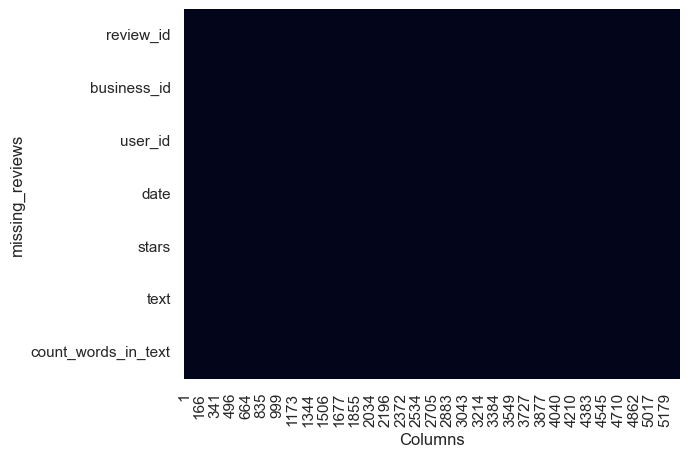

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(dataset_missing_reviews_less3k.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("missing_reviews")

plt.show()

C:\Users\khan\AppData\Local\Temp\ipykernel_5580\2765526301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_missing_reviews_less3k.loc[:,"missing_reviews"] = np.where(dataset_missing_reviews_less3k["text"].isna(), 1, 0)
C:\Users\khan\AppData\Local\Temp\ipykernel_5580\2765526301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_missing_reviews_less3k.loc[:,"missing_stars"] = 4 - dataset_missing_reviews_less3k["stars"]


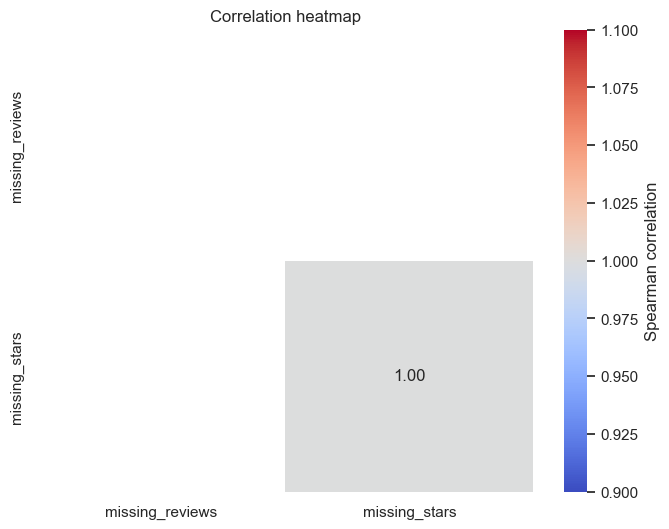

In [38]:
import numpy as np

dataset_missing_reviews_less3k.loc[:,"missing_reviews"] = np.where(dataset_missing_reviews_less3k["text"].isna(), 1, 0)
dataset_missing_reviews_less3k.loc[:,"missing_stars"] = 4 - dataset_missing_reviews_less3k["stars"]
columns_of_interest = ["missing_reviews", "missing_stars"]
correlation_matrix = dataset_missing_reviews_less3k[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [44]:
(dataset_missing_reviews_less3k.drop(['count_words_in_text'],axis=1).to_csv("HFYelpCleanedplus3k.csv",index=False ))
dataset_missing_reviews_less3k

,review_id,business_id,user_id,date,stars,text,count_words_in_text
1,9W0w97wiLa4KwXZ4RCE1FQ,KhXE6BV9JH6-sl6csz7E0g,RI9MqHrVqzZ0AgSXlGvx5A,2016-04-29 17:59:27,1.0,My husband and I went there three weeks ago in...,199
2,Yk6oEXgRwqw7Q9mZzPbS8A,luUGLqA3Gxv5raCJOAzblw,rKGTBWaFgu8a60DFqeK3Fg,2018-06-10 13:05:28,3.0,We came here on Saturday night after watching ...,131
3,OC77WaRpdwiujj70cGhwIg,U7JypsxzjH5f41NFZ82bdw,eWu1xPt52B-yMZmIyBIUsw,2012-03-05 18:45:16,4.0,So I am one of those people that reviews fast ...,218
4,9ZufNcTWsEVFmg6WPUebyA,-t1hxZ6X-XaIU4BBUQCXGA,Fa00Bcgu0hihpDGbdHaUeA,2017-04-05 23:24:55,4.0,There are several Pizza Huts in the greater Ph...,88
6,7In43zh1oVmU3Bj7gD7WSA,41QlNQkkCVvmzOPSFFz1FA,Dh6OTRg1ajZ6QLZgbOTcBQ,2016-04-10 00:22:04,5.0,I love this place! I come here all the time in...,176
...,...,...,...,...,...,...,...
5324,U5EUeCuy9u97W-bKmiBDlQ,9r-sVEHe8BQn518XgJvzPA,nBJfL3u--q_1y5-LyvBjWA,2017-05-01 05:59:41,1.0,Went for a late night snack... I ordered two i...,118
5325,lpVPRi2u4J9QsKe6rRSVjw,C809UuprygJyEgJw4wr2Pg,4kjVKQhMJKdlasEkn_Nkxw,2008-09-07 15:46:10,2.0,Was Domino's pizza always this bad? It couldn'...,65
5327,nWcL5WeijNNklT1Xsu04lQ,icZ4cBKO1VvzWnQxgzejog,almRxI4qRYyq_ex1Byy_rw,2021-02-23 23:05:45,3.0,"This place is in a shopping area, close to a W...",60
5328,SWRavv72TJgCDHCUwQgOEQ,Q4q9xFDxErreYTMrRshP_Q,RAjPmSA0kCytqAa_uJyyQQ,2019-07-07 16:48:47,5.0,TLDR: Great option for catering events! \nI or...,153
